# GRIP: The Sparks Foundation

<b>Data Science and Business Analytics Intern

<b>Author: Km Varsha

<b>Task 2: Prediction using Unsupervised Learning

<b>In this task, we will predict the optimum number of clusters using K-means Clustering in the Iris dataset and represent it visually.

In [32]:
#importing all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
#Reading Iris datset
df = pd.read_csv("Iris.csv")

<b>Exploring the data

In [34]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
#Droping ID column as it is not necessary 

df=df.drop(['Id'],axis = 1)

In [36]:
df.shape

(150, 5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
#Checking is their is any null values in the given dataset

df.isnull().values.any()

False

In [40]:
#Cheking if their is any duplicate values in the dataset

df.duplicated().values.any()

True

In [41]:
df=df.drop_duplicates()

In [42]:
df.duplicated().values.any()

False

In [43]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<b>Univariate Analysis

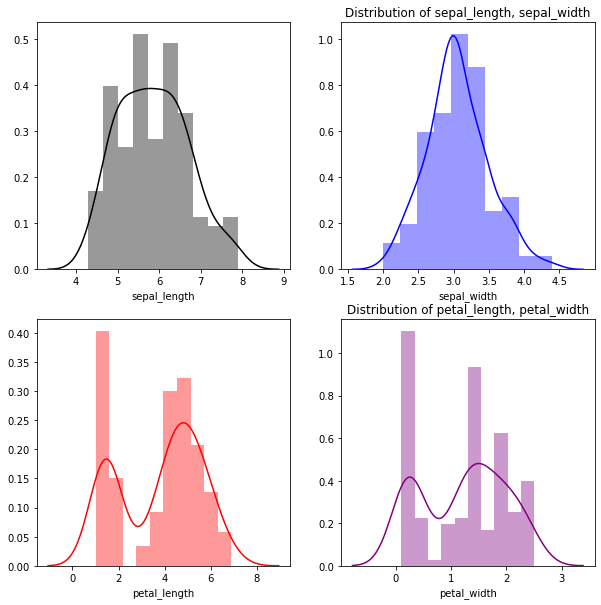

In [44]:
plt.rcParams['figure.figsize'] = (10,10)
plt.subplot(221)
sns.distplot(df['SepalLengthCm'],kde=True,color='black',bins=10)
plt.xlabel('sepal_length')

plt.subplot(222)
sns.distplot(df['SepalWidthCm'],kde=True,color='blue',bins=10)
plt.xlabel('sepal_width')

plt.title('Distribution of sepal_length, sepal_width')

plt.subplot(223)
sns.distplot(df['PetalLengthCm'],kde=True,color='red',bins=10)
plt.xlabel('petal_length')

plt.subplot(224)
sns.distplot(df['PetalWidthCm'],kde=True,color='purple',bins=10)
plt.xlabel('petal_width')

plt.title('Distribution of petal_length, petal_width')
plt.show()

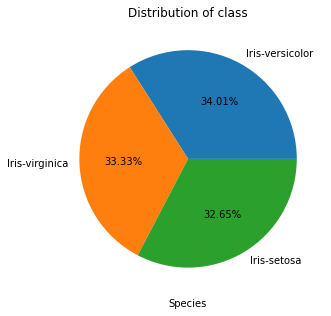

In [45]:
plt.rcParams['figure.figsize'] = (5,5)
plt.subplot()
plt.pie(df['Species'].value_counts().values,labels=df['Species'].value_counts().index,autopct='%1.2f%%')
plt.xlabel('Species')

plt.title('Distribution of class')
plt.show()

Observation:
1-Here variable"Sepal length" and " Sepal width" are approximately following the empirical rule formula, but "petal length"and "petal width" do not, may they have outliers.

2-There are three categories in the dependent variable, which is approximately having equal number of values.

<b>Bivariate Analysis

In [46]:
data = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

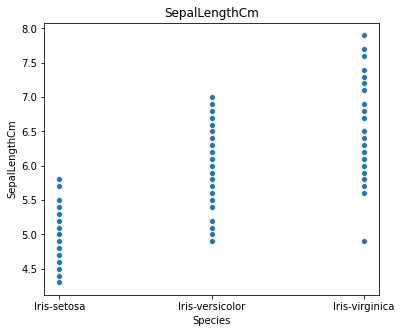

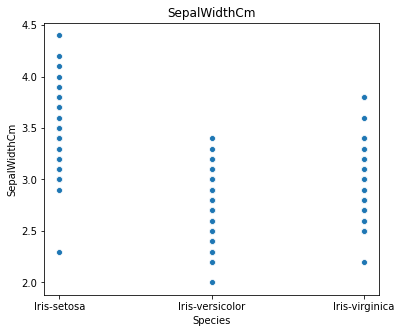

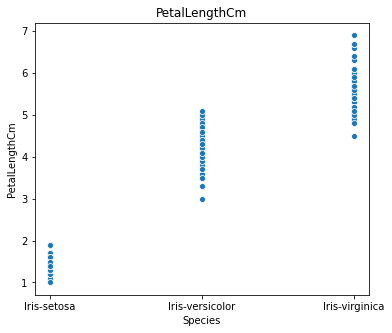

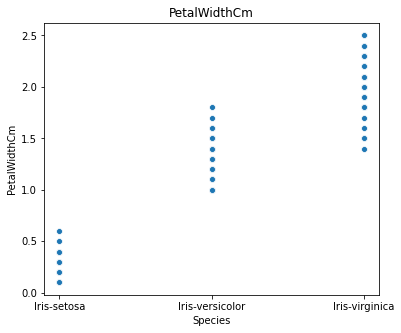

In [47]:
for feature in data:
    plt.rcParams['figure.figsize'] = (6,5)
    sns.scatterplot(x="Species",y=feature,data=df, palette="mako")
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Observation:
1- Each category of dependent variable falls in a specific range of values of every independent varibles. 

<b> Detecting Outliers

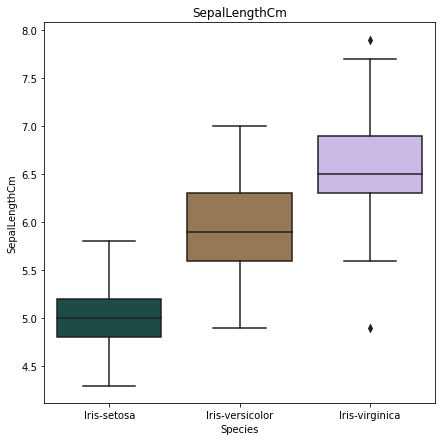

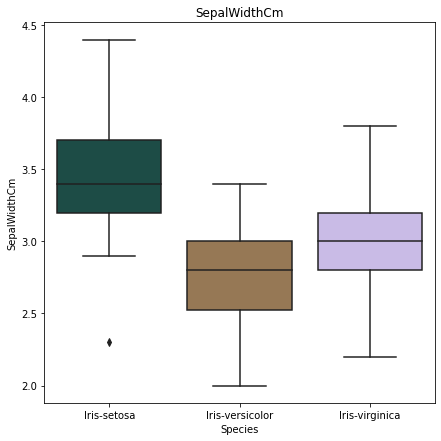

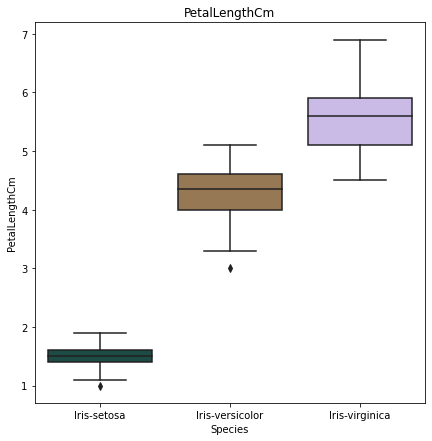

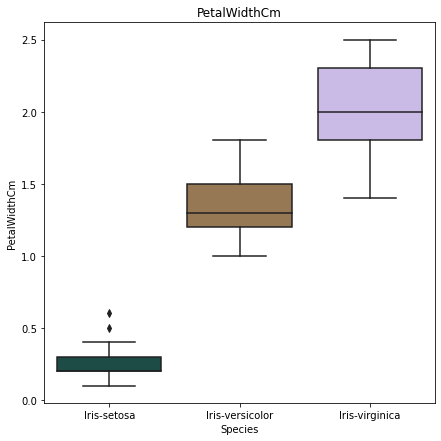

In [48]:
for feature in data:
    
    plt.rcParams['figure.figsize'] = (7,7)
    sns.boxplot(x='Species',y=feature,data=df,palette="cubehelix")
    plt.xlabel('Species')
    plt.title(feature)
    plt.show()

Observation:
1- As, we can see that here is very less amount of outliers, so we can ignore them.

<b>Multivariate Analysis

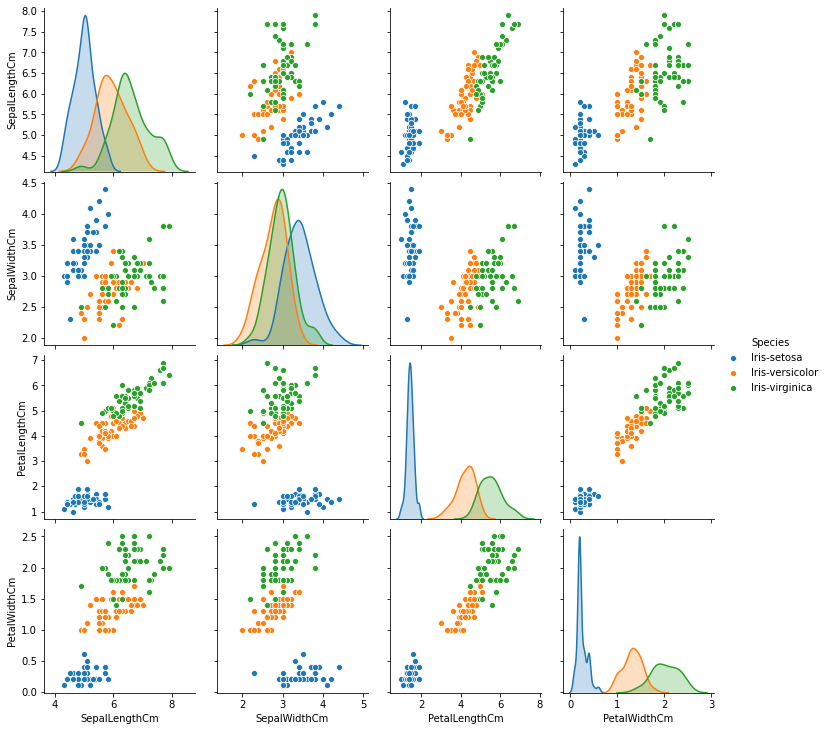

In [49]:
sns.pairplot(df, hue= 'Species')

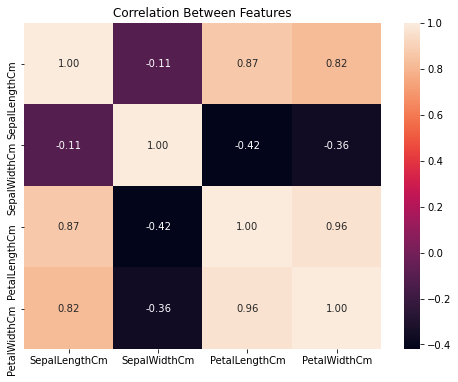

In [50]:
# Correlation
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

plt.title("Correlation Between Features")
plt.show()

In [51]:
x=df.drop(columns={'Species'}).values

In [52]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

<b>How to find optimum number of clusters? Finding value of K?

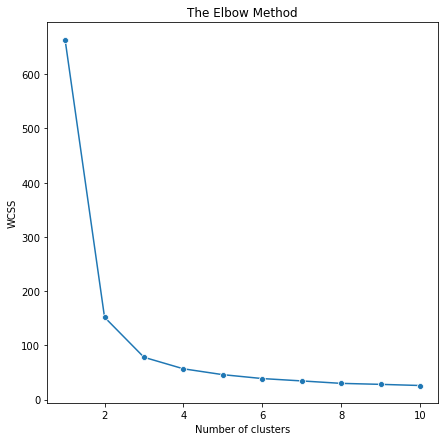

In [53]:
sns.lineplot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<b>From this Elbow graph, we get the optimum value for K would be 3. As we can see that with an increase in the number of clusters the WCSS value decreases and we select the value for K on the basis of the rate decrease in WCSS and we can see that after 3 the drop in WCSS is minimal.

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state= 42)
y_pred = kmeans.fit_predict(x)

# Visualizing Clusters

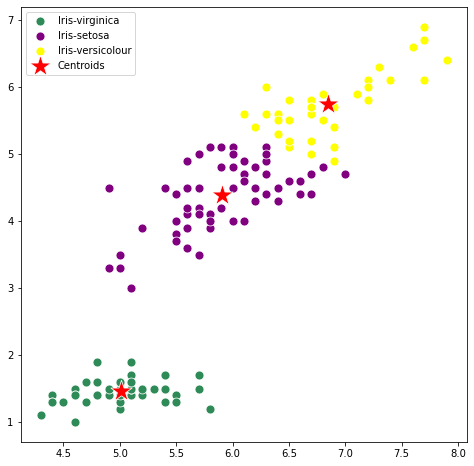

In [55]:
plt.figure(figsize=(8,8))
sns.scatterplot(x[y_pred == 0, 0], x[y_pred == 0, 2], s = 80, color = 'seagreen', label = 'Iris-virginica')
sns.scatterplot(x[y_pred == 1, 0], x[y_pred == 1, 2], s = 80, color = 'purple', label = 'Iris-setosa')
sns.scatterplot(x[y_pred == 2, 0], x[y_pred == 2, 2], s = 80, color = 'yellow', label = 'Iris-versicolour')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 500, color = 'red', marker='*', label = 'Centroids')